In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("mission_launches.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df = pd.read_csv("mission_launches.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [5]:
df["Year"] = df["Date"].dt.year
df.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020.0
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020.0
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020.0
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020.0


In [6]:
df["Country"] = df["Location"].str.split(",").str[-1].str.strip()
df[["Location", "Country"]].head()


,Location,Country
0,"LC-39A, Kennedy Space Center, Florida, USA",USA
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China
2,"Pad A, Boca Chica, Texas, USA",USA
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan
4,"SLC-41, Cape Canaveral AFS, Florida, USA",USA


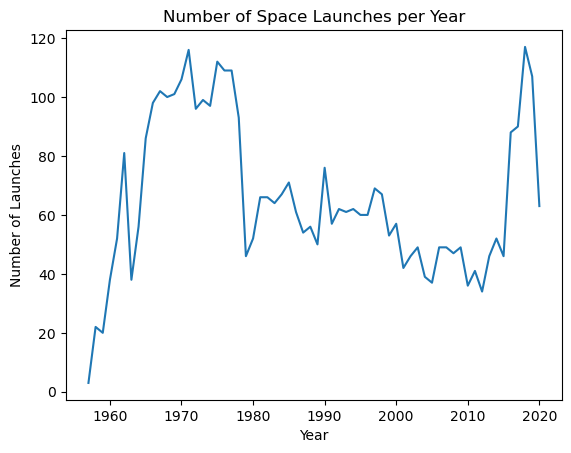

In [7]:
launches_per_year = df["Year"].value_counts().sort_index()

plt.figure()
plt.plot(launches_per_year.index, launches_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Space Launches per Year")
plt.show()


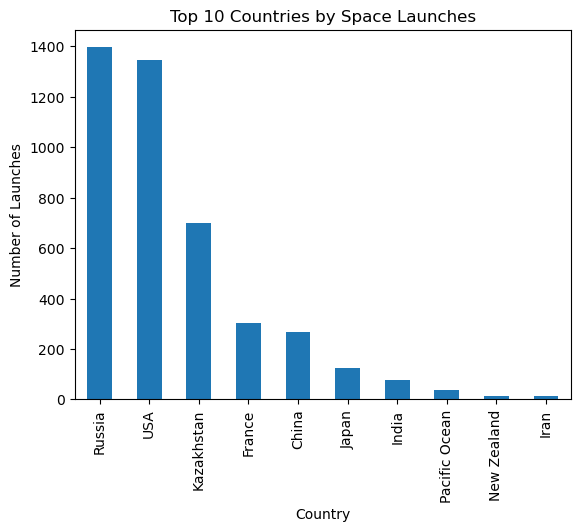

In [8]:
top_countries = df["Country"].value_counts().head(10)

plt.figure()
top_countries.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Launches")
plt.title("Top 10 Countries by Space Launches")
plt.show()


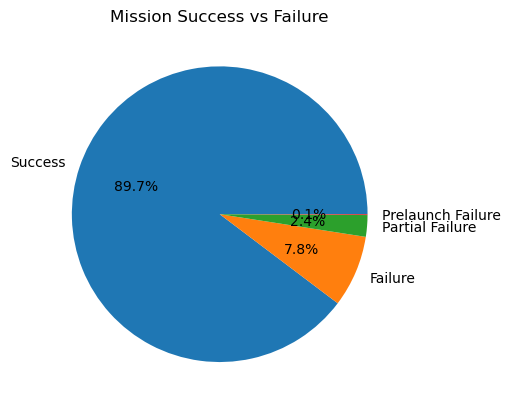

In [9]:
mission_status = df["Mission_Status"].value_counts()

plt.figure()
mission_status.plot(kind="pie", autopct="%1.1f%%")
plt.title("Mission Success vs Failure")
plt.ylabel("")
plt.show()


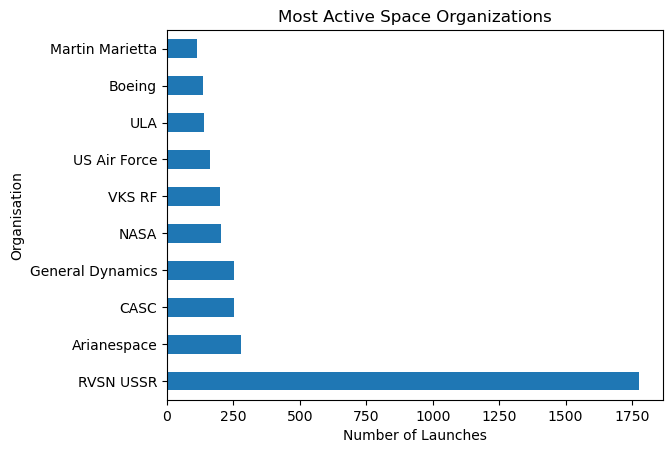

In [10]:
top_orgs = df["Organisation"].value_counts().head(10)

plt.figure()
top_orgs.plot(kind="barh")
plt.xlabel("Number of Launches")
plt.title("Most Active Space Organizations")
plt.show()


In [12]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")


In [13]:
avg_price = (
    df.groupby("Organisation")["Price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


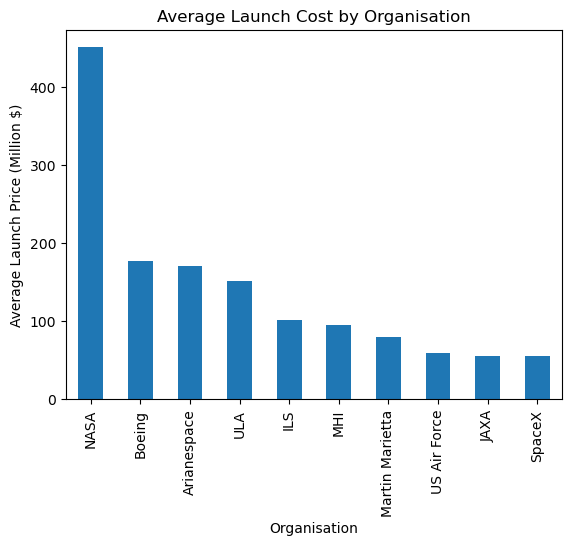

In [14]:
plt.figure()
avg_price.plot(kind="bar")
plt.xlabel("Organisation")
plt.ylabel("Average Launch Price (Million $)")
plt.title("Average Launch Cost by Organisation")
plt.show()


In [15]:
df["Price"].dtype


dtype('float64')

In [16]:
price_df = df.dropna(subset=["Price"])

avg_price = (
    price_df.groupby("Organisation")["Price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
